In [1]:
import os
os.getcwd()

'/home/matthew/anaconda3/envs/insight/staycationLA/notebooks'

In [8]:
#analysis based on: https://www.kaggle.com/mrisdal/shifterator-analysis-on-animal-crossing-reviews


In [1]:
#pip install shifterator

In [5]:
# Import packages

import pandas as pd
import numpy as np
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re

#from shifterator import relative_shift as rs

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [6]:
# Load in the dataframe
phu1 = pd.read_csv("../data/raw/phuket.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
phu=phu1[0:103]

phu.head

<bound method NDFrame.head of      stars                                       title  \
0       50                               “A must see!”   
1       50  “INDIE Bric a Brac accessories for unisex”   
2       20            “If I Knew Then What I Know Now”   
3       20                       “Over crowded Phuket”   
4       50                         “Driving in Phuket”   
..     ...                                         ...   
98      50                            “Best time ever”   
99      40             “Loved the Gibbons and beaches”   
100     50                      “Adventures in Phuket”   
101     50                 “tsunami Travellers Update”   
102     50    “Details of affect of Tsumani on Phuket”   

                                                  text  
0    When I was here last November it was raining c...  
1    Indie Bric a Brac and accessories shop, is lik...  
2    My boyfriend and I decided to live in Phuket f...  
3    I made my first trip to Phuket in the mi

In [7]:
# Divide reviews into positive and negative based on the median grade for the dataset
median_stars = 35

phu.loc[phu['stars'] <= median_stars, 'review_category'] = 'Negative' 
phu.loc[phu['stars'] > median_stars, 'review_category'] = 'Positive' 

phu_neg = phu[phu['review_category'] == 'Negative']
phu_pos = phu[phu['review_category'] == 'Positive']

/home/matthew/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/matthew/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
#phu_neg.head

In [9]:
#phu_pos.head

In [10]:
#texts = phu['text'].tolist()
#texts_neg = phu_neg['text'].tolist()
phu_texts_pos = phu_pos['text'].tolist()

In [11]:
type(phu_texts_pos)

list

In [12]:
# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(phu_texts_pos)) 

#print(test)

In [14]:
#https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [16]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
nltk.download('punkt')
import string
def pre_process(corpus):
    # convert input corpus to lower case.
    corpus = corpus.lower()
    # collecting a list of stop words from nltk and punctuation form
    # string class and create single array.
    
    #corpus= [remove_punctuation(corpus) for t in corpus]
    corpus= " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", corpus).split())
    
  
    # remove stop words from string.
    stopset = list(stopwords.words('english'))
    # word_tokenize is used to tokenize the input corpus in word tokens.
    corpus = " ".join([i for i in word_tokenize(corpus) if i not in stopset])
    
   
    # remove punctuations from string.
    #pset = list(string.punctuation) 
    # word_tokenize is used to tokenize the input corpus in word tokens.
    #corpus = " ".join([i for i in word_tokenize(corpus) if i not in pset])
    
    
    # remove non-ascii characters
    corpus = unidecode(corpus)
    return corpus

#pre_process(test)

[nltk_data] Downloading package punkt to /home/matthew/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
test1=pre_process(test)

In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
#create an object of class PorterStemmer
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)



In [23]:
x=stemSentence(test1)
#print(x)

In [25]:
import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

In [28]:
wordList = re.sub("[^\w]", " ",  x2).split()
#print(wordList)

In [29]:
x3 = collections.Counter(wordList)

In [30]:
# Dataframes for most frequent common words in positive and negative reviews
phu_common_pos = pd.DataFrame(x3.most_common(15),
                             columns=['words', 'count'])


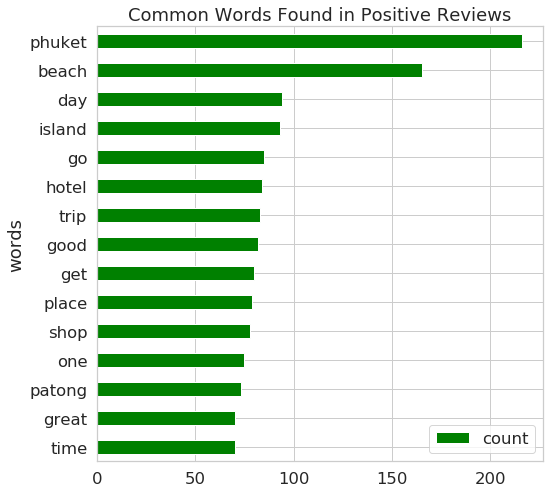

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
phu_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [205]:
print(wordList)

['last', 'novemb', 'rain', 'cat', 'dog', 'pick', 'day', 'time', 'get', 'amaz', 'view', 'took', 'mani', 'great', 'photo', 'start', 'walk', 'museum', 'take', 'old', 'world', 'charm', 'like', 'get', 'bless', 'one', 'monk', 'experienc', 'mani', 'foreign', 'continu', 'chant', 'wonder', 'around', 'help', 'ambienc', 'visit', 'indi', 'bric', 'brac', 'accessori', 'shop', 'like', 'breath', 'fresh', 'air', 'locat', 'soi', 'suke', 'ao', 'chalong', 'phuket', 'sell', 'array', 'thing', 'look', 'cotton', 'shirt', 'ideal', 'phuket', 'climat', 'tropic', 'also', 'sell', 'overs', 'cloth', 'hard', 'find', 'anywher', 'thailand', 'unisex', 'shop', 'abl', 'find', 'want', 'shop', 'own', 'jui', 'speak', 'fluent', 'english', 'troubl', 'commun', 'see', 'want', 'ask', 'alway', 'will', 'oblig', 'phuket', 'best', 'view', 'car', 'window', 'visit', 'phuket', 'juli', 'rent', 'honda', 'civic', 'l', 'automat', 'day', 'stay', 'experi', 'better', 'expect', 'drive', 'phuket', 'real', 'treat', 'driver', 'love', 'wind', 'road

In [206]:
print(x3)

Counter({'phuket': 216, 'beach': 165, 'day': 94, 'island': 93, 'go': 85, 'hotel': 84, 'trip': 83, 'good': 82, 'get': 80, 'place': 79, 'shop': 78, 'one': 75, 'patong': 73, 'time': 70, 'great': 70, 'stay': 69, 'peopl': 65, 'phi': 65, 'like': 64, 'would': 62, 'us': 59, 'food': 59, 'around': 58, 'price': 58, 'thai': 58, 'visit': 53, 'back': 50, 'realli': 48, 'tour': 48, 'also': 44, 'love': 44, 'much': 43, 'mani': 42, 'see': 42, 'cheap': 42, 'take': 41, 'night': 41, 'thailand': 39, 'want': 39, 'tri': 39, 'even': 39, 'experi': 38, 'first': 37, 'enjoy': 37, 'baht': 37, 'beauti': 36, 'kata': 36, 'thing': 35, 'look': 35, 'way': 35, 'went': 35, 'nice': 34, 'restaur': 34, 'area': 33, 'travel': 33, 'best': 32, 'walk': 31, 'well': 31, 'need': 31, 'holiday': 31, 'show': 31, 'got': 30, 'lot': 30, 'bar': 30, 'boat': 30, 'year': 29, 'town': 29, 'resort': 28, 'offer': 28, 'ride': 28, 'bit': 28, 'tourist': 28, 'friendli': 28, 'karon': 27, 'recommend': 27, 'bay': 27, 'took': 26, 'come': 26, 'must': 26, 'f

In [36]:
# initialize an empty string 
str1 = " " 
    
# return string   
wordstring=(str1.join(wordList)) 
#print(wordstring)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

    
# creating vocabulary using uni-gram and bi-gram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(x3)

feature_vectors = tfidf_vectorizer.transform(x3)

In [35]:
print(feature_vectors)

  (0, 1229)	1.0
  (1, 1508)	1.0
  (2, 1796)	1.0
  (3, 363)	1.0
  (4, 646)	1.0
  (5, 1662)	1.0
  (6, 560)	1.0
  (7, 2321)	1.0
  (8, 909)	1.0
  (9, 87)	1.0
  (10, 2466)	1.0
  (11, 2336)	1.0
  (12, 1348)	1.0
  (13, 942)	1.0
  (14, 1653)	1.0
  (15, 2160)	1.0
  (16, 2482)	1.0
  (17, 1448)	1.0
  (18, 2251)	1.0
  (19, 1536)	1.0
  (20, 2559)	1.0
  (21, 397)	1.0
  (22, 1269)	1.0
  (23, 250)	1.0
  (24, 1540)	1.0
  :	:
  (2583, 527)	1.0
  (2584, 691)	1.0
  (2585, 1759)	1.0
  (2586, 1600)	1.0
  (2587, 1112)	1.0
  (2588, 608)	1.0
  (2589, 2308)	1.0
  (2590, 1526)	1.0
  (2591, 1155)	1.0
  (2592, 907)	1.0
  (2593, 339)	1.0
  (2594, 2406)	1.0
  (2595, 173)	1.0
  (2596, 1106)	1.0
  (2597, 1173)	1.0
  (2598, 1419)	1.0
  (2599, 1000)	1.0
  (2600, 568)	1.0
  (2601, 604)	1.0
  (2602, 1481)	1.0
  (2603, 631)	1.0
  (2604, 790)	1.0
  (2605, 1283)	1.0
  (2606, 1306)	1.0
  (2607, 1040)	1.0


In [207]:
#from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
#tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
#tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)
 

In [37]:
# Load in the dataframe
mill = pd.read_csv("../data/raw/LAmill.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

In [40]:
# Divide reviews into positive and negative based on the median grade for the dataset
median_stars = 35

mill.loc[mill['stars'] > median_stars, 'review_category'] = 'Positive' 

mill_pos = mill[mill['review_category'] == 'Positive']

mill_texts_pos = mill_pos['text'].tolist()

type(mill_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(mill_texts_pos)) 

#print(test)

mill1=pre_process(test)

x=stemSentence(mill1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

mwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

mill3 = collections.Counter(mwordList)

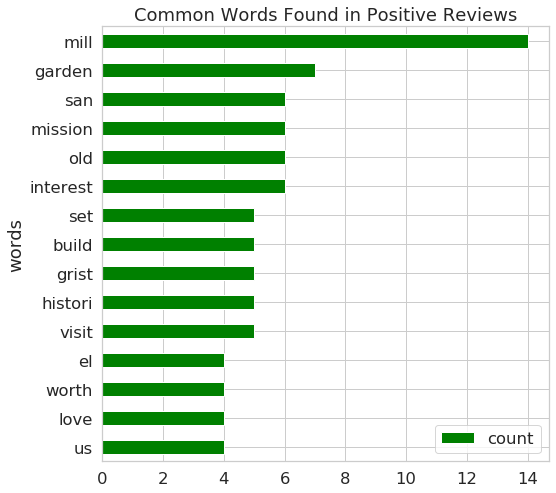

In [44]:
# Dataframes for most frequent common words in positive and negative reviews
mill_common_pos = pd.DataFrame(mill3.most_common(15),
                             columns=['words', 'count'])


fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mill_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

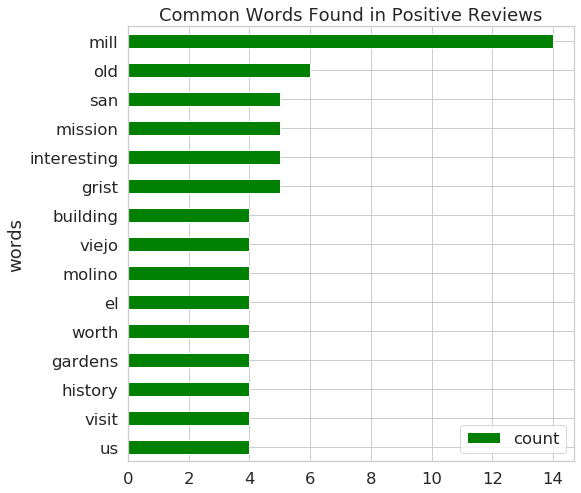

In [112]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mill_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [46]:
# initialize an empty string 
str1 = " " 
    
# return string   
mill_wordstring=(str1.join(mwordList)) 

#print(mill_wordstring)
#print(wordList)

In [58]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [60]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

type(jur_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(jur_texts_pos)) 

#print(test)

jur1=pre_process(test)

x=stemSentence(jur1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

jwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

jur3 = collections.Counter(jwordList)

In [64]:
# initialize an empty string 
str1 = " " 
    
# return string   
jur_wordstring=(str1.join(jwordList)) 

#print(mill_wordstring)
#print(wordList)

In [58]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [60]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

type(jur_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(jur_texts_pos)) 

#print(test)

jur1=pre_process(test)

x=stemSentence(jur1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

jwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

jur3 = collections.Counter(jwordList)

In [64]:
# initialize an empty string 
str1 = " " 
    
# return string   
jur_wordstring=(str1.join(jwordList)) 

#print(mill_wordstring)
#print(wordList)

In [58]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [60]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

type(jur_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(jur_texts_pos)) 

#print(test)

jur1=pre_process(test)

x=stemSentence(jur1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

jwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

jur3 = collections.Counter(jwordList)

In [64]:
# initialize an empty string 
str1 = " " 
    
# return string   
jur_wordstring=(str1.join(jwordList)) 

#print(mill_wordstring)
#print(wordList)

In [61]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [62]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

type(mbr_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(mbr_texts_pos)) 

#print(test)

mbr1=pre_process(test)

x=stemSentence(mbr1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

mbrwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

mbr3 = collections.Counter(mbrwordList)

In [63]:
# initialize an empty string 
str1 = " " 
    
# return string   
mbr_wordstring=(str1.join(mbrwordList)) 

#print(mill_wordstring)
#print(wordList)

In [72]:
# Load in the dataframe
bal = pd.read_csv("../data/raw/LAbalboa.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [73]:
median_stars = 35

bal.loc[bal['stars'] > median_stars, 'review_category'] = 'Positive' 

bal_pos = bal[bal['review_category'] == 'Positive']

bal_texts_pos = bal_pos['text'].tolist()

type(bal_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(bal_texts_pos)) 

#print(test)

bal1=pre_process(test)

x=stemSentence(bal1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

bwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

bal3 = collections.Counter(bwordList)

In [74]:
# initialize an empty string 
str1 = " " 
    
# return string   
bal_wordstring=(str1.join(bwordList)) 

#print(mill_wordstring)
#print(wordList)

In [79]:
reviews=[wordstring, mbr_wordstring, bal_wordstring, jur_wordstring, mill_wordstring]

In [80]:
#https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity
tfidf = TfidfVectorizer().fit_transform(reviews)
tfidf

<5x5290 sparse matrix of type '<class 'numpy.float64'>'
	with 8712 stored elements in Compressed Sparse Row format>

In [81]:
tfidf[0:1]

<1x5290 sparse matrix of type '<class 'numpy.float64'>'
	with 2595 stored elements in Compressed Sparse Row format>

In [82]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[0:1], tfidf).flatten()
cosine_similarities

array([1.        , 0.21132588, 0.44388813, 0.2817149 , 0.11290023])

In [ ]:
mill_wordstring and wordstring

In [ ]:
need to turn strings from different places into a list of strings to use in tf idf

In [48]:
final2=[wordstring, mill_wordstring]
#print(final2)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

    
# creating vocabulary using uni-gram and bi-gram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(final2)

feature_vectors = tfidf_vectorizer.transform(final2)

print(feature_vectors)

  (0, 13296)	0.0018235852112742906
  (0, 13295)	0.0018235852112742906
  (0, 13294)	0.0018235852112742906
  (0, 13293)	0.0018235852112742906
  (0, 13292)	0.0018235852112742906
  (0, 13291)	0.009117926056371453
  (0, 13290)	0.0018235852112742906
  (0, 13289)	0.0018235852112742906
  (0, 13288)	0.003647170422548581
  (0, 13287)	0.0018235852112742906
  (0, 13286)	0.0018235852112742906
  (0, 13282)	0.0018235852112742906
  (0, 13281)	0.0018235852112742906
  (0, 13280)	0.003647170422548581
  (0, 13279)	0.0018235852112742906
  (0, 13278)	0.003647170422548581
  (0, 13277)	0.0018235852112742906
  (0, 13275)	0.00778497538254339
  (0, 13274)	0.0018235852112742906
  (0, 13273)	0.0018235852112742906
  (0, 13272)	0.0018235852112742906
  (0, 13271)	0.0018235852112742906
  (0, 13270)	0.0018235852112742906
  (0, 13269)	0.0018235852112742906
  (0, 13268)	0.0018235852112742906
  :	:
  (1, 597)	0.02800948506922518
  (1, 578)	0.02800948506922518
  (1, 570)	0.03985795863253771
  (1, 568)	0.02800948506922518
 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(final2)

In [55]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
phuket,0.406583
beach,0.310584
day,0.176939
island,0.175057
trip,0.156233
...,...
diorama,0.000000
lo,0.000000
arcangel,0.000000
art,0.000000


In [56]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
mill,0.489645
garden,0.244823
mission,0.209848
san,0.209848
grist,0.174873
...,...
fuss,0.000000
futur,0.000000
ga,0.000000
gala,0.000000


In [ ]:
https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XtXAERZlBEJ

In [ ]:
https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [ ]:
https://medium.com/@Intellica.AI/comparison-of-different-word-embeddings-on-text-similarity-a-use-case-in-nlp-e83e08469c1c

In [ ]:
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [91]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/santorini.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:163]

san.head

<bound method NDFrame.head of      stars                                              title  \
0       30  “Able bodie only especially if from a Cruise S...   
1       30                              “Archeological ruins”   
2       50         “...from before Christ to modern times...”   
3       50                      “Santorini a must see place.”   
4       50                                 “Marvelous island”   
..     ...                                                ...   
158     40                         “Santorini is the best!!!”   
159     50                  “Things not to miss in Santorini”   
160     30                               “It's hot and windy”   
161     50                             “Athens and Santorini”   
162     50                                         “amazing!”   

                                                  text  
0    If port is busy please allow plenty of time to...  
1    We were on a cruise ship and visited on our ow...  
2    Santorini Isl

In [95]:
median_stars = 35

san.loc[san['stars'] > median_stars, 'review_category'] = 'Positive' 

san_pos = san[san['review_category'] == 'Positive']

san_texts_pos = san_pos['text'].tolist()

san_clean_texts_pos = clean_text(san_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
san_common_pos = pd.DataFrame(san_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

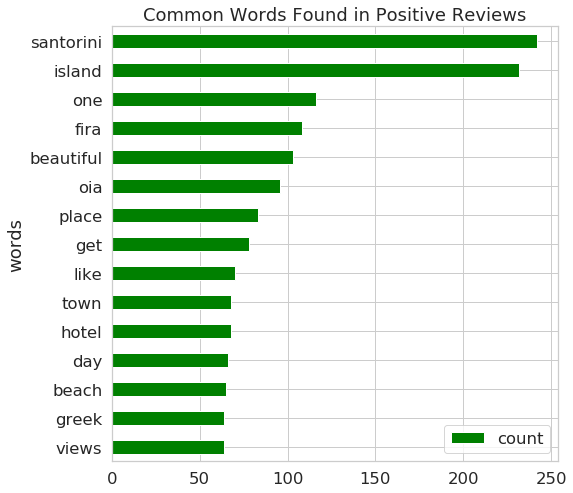

In [96]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
san_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

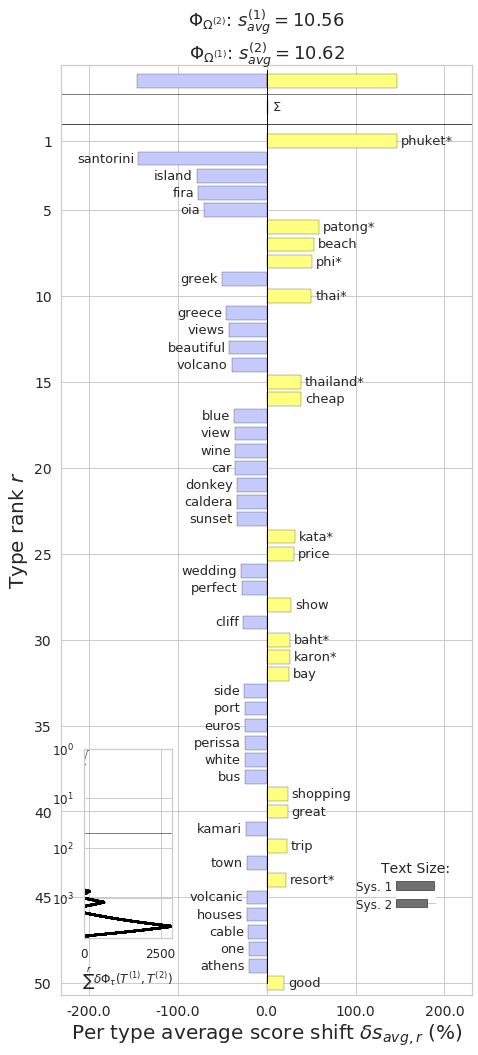

In [97]:
# Get an entropy shift
entropy_shift = rs.EntropyShift(reference=san_clean_texts_pos,
                                comparison=phu_clean_texts_pos,
                                base=2)
entropy_shift.get_shift_graph() 

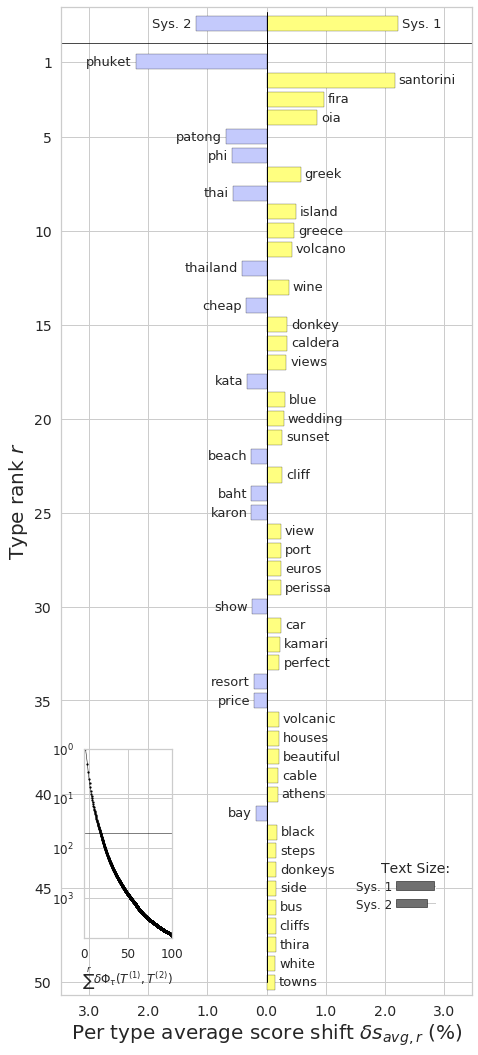

In [98]:
# Get a Jensen-Shannon divergence shift
#The Jensen-Shannon divergence symmetrizes the Kullback-Leibler divergence by measuring the 
#average divergence of each text from another text representing their average. 
#The measure is symmetric, meaning there is no order in how the texts are specified.
from shifterator import symmetric_shift as ss
jsd_shift = ss.JSDivergenceShift(system_1=san_clean_texts_pos,
                                 system_2=phu_clean_texts_pos,
                                 base=2)
jsd_shift.get_shift_graph()

In [100]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

jur.head

<bound method NDFrame.head of      stars                                              title  \
0       50                 Unique objects and unique location   
1       10                                          Not worth   
2       30                    Obscure, Random, a Trip in Time   
3       50  Difficult to Describe, but fascinating and wor...   
4       50                                      My cup of tea   
..     ...                                                ...   
203     50                            Our new favorite museum   
204     50                          Just go. It's phenomenal.   
205     40  At the Intersection of Natural History, Farce ...   
206     50                      a most stimulating experience   
207     50  Interesting place to see very unusual and stra...   

                                                  text      username  
0    I'll never work out what was real, what is myt...   niceguy1966  
1    Don't go if you are not fond of ancient hi

In [101]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

jur_clean_texts_pos = clean_text(jur_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
jur_common_pos = pd.DataFrame(jur_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [104]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [103]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

mbr_clean_texts_pos = clean_text(mbr_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
mbr_common_pos = pd.DataFrame(mbr_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [110]:
# Load in the dataframe
mill = pd.read_csv("../data/raw/LAmill.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [127]:
median_stars = 35

mill.loc[mill['stars'] > median_stars, 'review_category'] = 'Positive' 

mill_pos = mill[mill['review_category'] == 'Positive']

mill_texts_pos = mill_pos['text'].tolist()


In [129]:
pip install unidecode

     |████████████████████████████████| 238 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [130]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode

In [135]:
corpus= mill_texts_pos

#import stringdef pre_process(corpus):
    # convert input corpus to lower case.
corpus = corpus.lower()

AttributeError: 'list' object has no attribute 'lower'

In [ ]:

    # collecting a list of stop words from nltk and punctuation form
    # string class and create single array.
    stopset = stopwords.words('english') + list(string.punctuation)
    # remove stop words and punctuations from string.
    # word_tokenize is used to tokenize the input corpus in word tokens.
   corpus = " ".join([i for i in word_tokenize(corpus) if i not in stopset])
    # remove non-ascii characters
    corpus = unidecode(corpus)
    return corpuspre_process("Sample of non ASCII: Ceñía. How to remove stopwords and punctuations?")

In [ ]:


mill_clean_texts_pos = clean_text(mill_texts_pos)

In [136]:
print(mill_clean_texts_pos)

Counter({'mill': 14, 'old': 6, 'grist': 5, 'interesting': 5, 'mission': 5, 'san': 5, 'us': 4, 'visit': 4, 'history': 4, 'gardens': 4, 'worth': 4, 'el': 4, 'molino': 4, 'viejo': 4, 'building': 4, 'california': 4, 'setting': 4, 'free': 4, 'garden': 3, 'huntington': 3, 'gabriel': 3, 'years': 3, 'nice': 3, 'well': 3, 'led': 2, 'museum': 2, 'recommended': 2, 'outside': 2, 'grounds': 2, 'house': 2, 'including': 2, 'built': 2, '1816': 2, 'father': 2, 'maria': 2, 'de': 2, 'zalvidea': 2, 'former': 2, 'historical': 2, 'original': 2, 'felt': 2, 'interior': 2, 'lovely': 2, 'colonial': 2, 'architecture': 2, 'wander': 2, 'local': 2, 'stopped': 2, 'glad': 2, 'since': 2, '200': 2, 'lady': 2, 'told': 2, 'appointment': 2, 'docent': 2, 'place': 2, 'used': 2, 'grain': 2, 'foundation': 2, 'go': 2, 'wonderful': 2, 'park': 2, 'street': 2, 'parking': 2, 'easy': 2, 'close': 2, 'summer': 2, 'leisurely': 1, 'sunday': 1, 'thanksgiving': 1, 'weekend': 1, 'friend': 1, 'young': 1, 'kids': 1, 'atmospheric': 1, 'welco

In [116]:
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [117]:
mill_final= stemmer.stem(mill_clean_texts_pos)

AttributeError: 'Counter' object has no attribute 'lower'

In [ ]:

print(stemmer.stem("Blessing"))
bless


lemmatizer = WordNetLemmatizer()
sentence = "The striped bats are hanging on their feet for best"
words = word_tokenize(sentence)for w in words:
    print(w, " : ", lemmatizer.lemmatize(w)

In [111]:

# Dataframes for most frequent common words in positive and negative reviews
mill_common_pos = pd.DataFrame(mill_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [100]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

jur.head

<bound method NDFrame.head of      stars                                              title  \
0       50                 Unique objects and unique location   
1       10                                          Not worth   
2       30                    Obscure, Random, a Trip in Time   
3       50  Difficult to Describe, but fascinating and wor...   
4       50                                      My cup of tea   
..     ...                                                ...   
203     50                            Our new favorite museum   
204     50                          Just go. It's phenomenal.   
205     40  At the Intersection of Natural History, Farce ...   
206     50                      a most stimulating experience   
207     50  Interesting place to see very unusual and stra...   

                                                  text      username  
0    I'll never work out what was real, what is myt...   niceguy1966  
1    Don't go if you are not fond of ancient hi

In [101]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

jur_clean_texts_pos = clean_text(jur_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
jur_common_pos = pd.DataFrame(jur_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [104]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [103]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

mbr_clean_texts_pos = clean_text(mbr_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
mbr_common_pos = pd.DataFrame(mbr_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

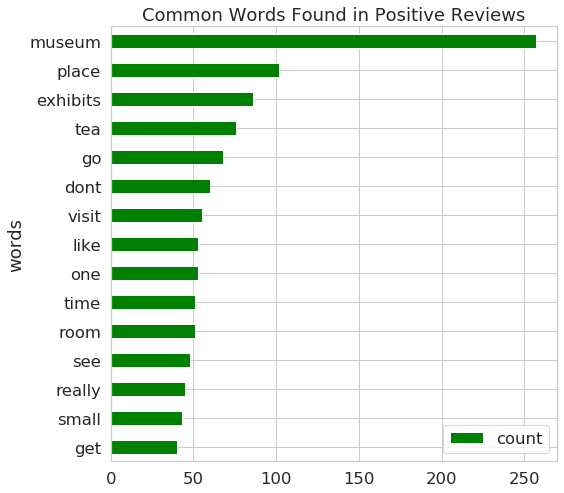

In [105]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
jur_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

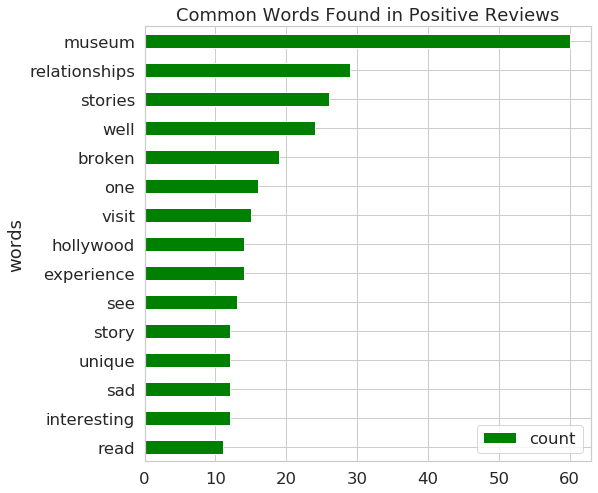

In [106]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mbr_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

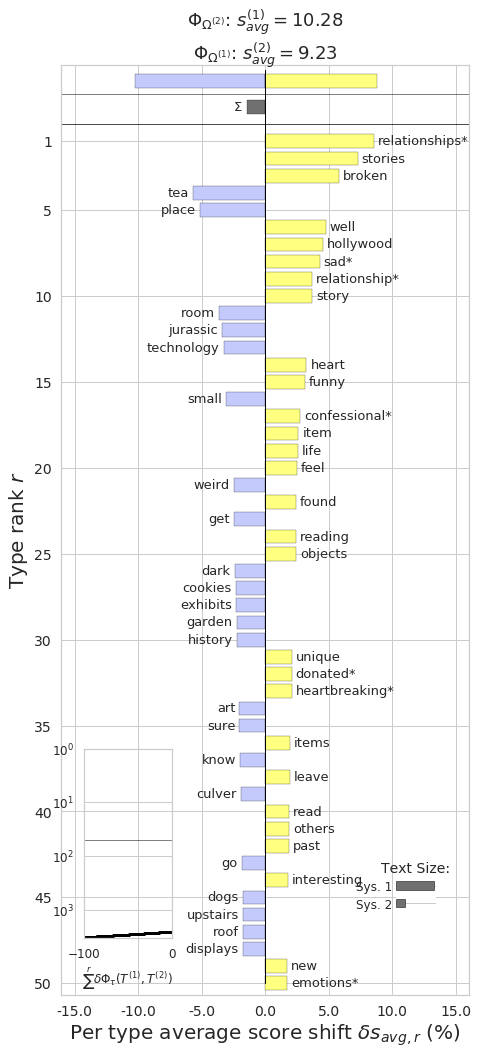

In [107]:
# Get an entropy shift
entropy_shift = rs.EntropyShift(reference=jur_clean_texts_pos,
                                comparison=mbr_clean_texts_pos,
                                base=2)
entropy_shift.get_shift_graph() 


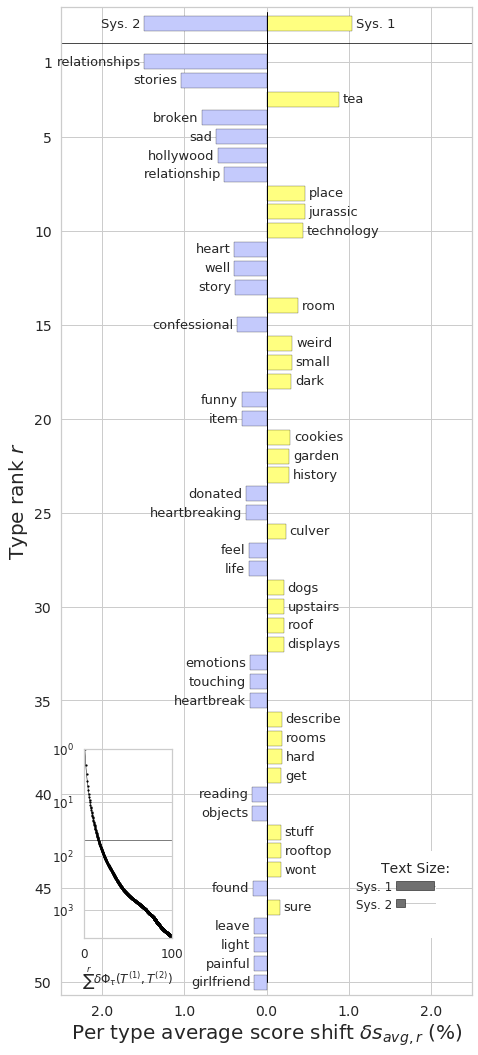

In [108]:
# Get a Jensen-Shannon divergence shift
#The Jensen-Shannon divergence symmetrizes the Kullback-Leibler divergence by measuring the 
#average divergence of each text from another text representing their average. 
#The measure is symmetric, meaning there is no order in how the texts are specified.
from shifterator import symmetric_shift as ss
jsd_shift = ss.JSDivergenceShift(system_1=jur_clean_texts_pos,
                                 system_2=mbr_clean_texts_pos,
                                 base=2)
jsd_shift.get_shift_graph()